In [104]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors

In [58]:
df = pd.read_csv('table_numbers.csv')
df = df.drop(['Overall'], axis=1)
df = df.set_index('state')
df.fillna(value=np.nan, inplace=True)

In [60]:
df

,Alcohol,Benzodiapenes,Cocaine,Heroin,Methamphetamine,Synthetic Opioids
state,,,,,,
Alabama,0.915554,-0.017692,0.736424,-0.375675,-0.238840,3.383570
Alaska,0.000000,1.363529,1.363529,-3.545176,1.605934,5.438966
Arizona,0.268271,0.475425,0.349577,0.433475,2.502971,6.553402
Arkansas,1.233971,1.121616,0.215976,-0.488098,2.022847,1.992347
California,0.758759,0.783529,0.144164,-0.354088,2.954103,3.889907
Colorado,-0.211689,0.681248,0.942621,-0.094062,2.961698,3.827692
Connecticut,1.948766,-0.998352,0.187961,-3.632891,0.494584,0.083196
Delaware,-2.424370,3.232493,-4.848740,1.616247,NaN,-2.525385
District of Columbia,-2.175348,1.127743,-1.450232,-1.160185,NaN,-0.795521


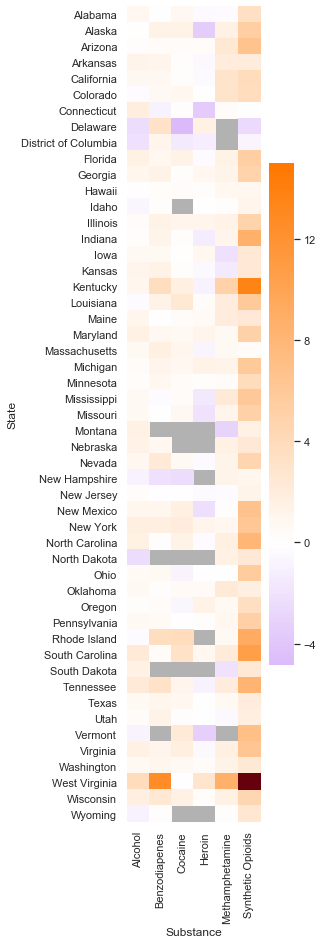

In [180]:
cmap=LinearSegmentedColormap.from_list('op',["#912cee", "w", "#ff7800"], N=256)
g = sns.heatmap(df, cmap = cmap, center = 0, vmax = 15, mask=df > 15)
g = sns.heatmap(df, mask=df < 15, cmap='Reds', annot=False, cbar=False, ax=g)
g.set_facecolor('#B2B2B2') 
sns.set(rc = {'figure.figsize':(4,15)})
plt.ylabel('State')
plt.xlabel('Substance')
plt.savefig('heatmap.png', dpi = 300, bbox_inches = "tight")

In [133]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

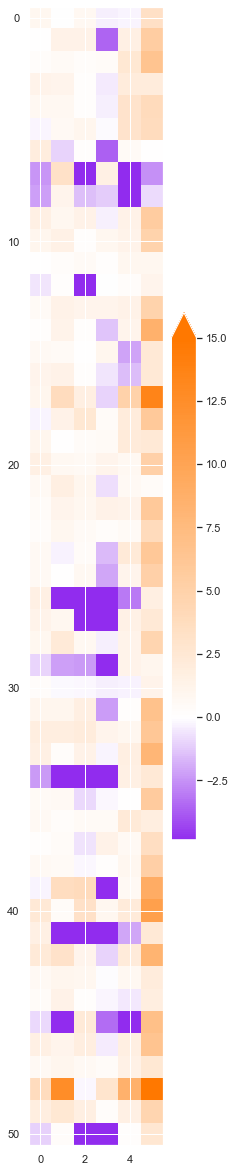

In [134]:
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, interpolation='none', vmax=15, norm = MidpointNormalize(midpoint = 0, vmax = 15))
cbar = fig.colorbar(im, extend='max')
cbar.cmap.set_over('red')

plt.show()